In [7]:
# Importar os pacotes

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
#from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import openpyxl

### Importar o banco de dados


In [8]:
dados = pd.read_excel("C:\\Users\\Paulo\\Desktop\\MBA DATASCIENCE\\Regression\\dados_admissao.xlsx")

### Visualizar as primeiras linhas do conjunto de dados


In [9]:
dados.head()

Serial No.  GRE  TOEFL  UniversityRating  SOP  LOR  CGPA  Research  Score
0           1  337    118                 4  4.5  4.5  9.65         1   92.0
1           2  324    107                 4  4.0  4.5  8.87         1   76.0
2           3  316    104                 3  3.0  3.5  8.00         1   72.0
3           4  322    110                 3  3.5  2.5  8.67         1   80.0
4           5  314    103                 2  2.0  3.0  8.21         0   65.0

### Verificar os tipos de dados e valores ausentes


In [10]:
display(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Serial No.        500 non-null    int64  
 1   GRE               500 non-null    int64  
 2   TOEFL             500 non-null    int64  
 3   UniversityRating  500 non-null    int64  
 4   SOP               500 non-null    float64
 5   LOR               500 non-null    float64
 6   CGPA              500 non-null    float64
 7   Research          500 non-null    int64  
 8   Score             500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


None

### Estatísticas descritivas das variáveis


In [11]:
# Variáveis métricas
display(dados[['GRE', 'TOEFL', 'SOP', 'LOR', 'CGPA', 'Score']].describe())

# Variáveis categóricas
display(dados['UniversityRating'].value_counts())
display(dados['Research'].value_counts())

GRE       TOEFL         SOP        LOR        CGPA      Score
count  500.000000  500.000000  500.000000  500.00000  500.000000  500.00000
mean   316.472000  107.192000    3.374000    3.48400    8.576440   72.17400
std     11.295148    6.081868    0.991004    0.92545    0.604813   14.11404
min    290.000000   92.000000    1.000000    1.00000    6.800000   34.00000
25%    308.000000  103.000000    2.500000    3.00000    8.127500   63.00000
50%    317.000000  107.000000    3.500000    3.50000    8.560000   72.00000
75%    325.000000  112.000000    4.000000    4.00000    9.040000   82.00000
max    340.000000  120.000000    5.000000    5.00000    9.920000   97.00000

UniversityRating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64

Research
1    280
0    220
Name: count, dtype: int64

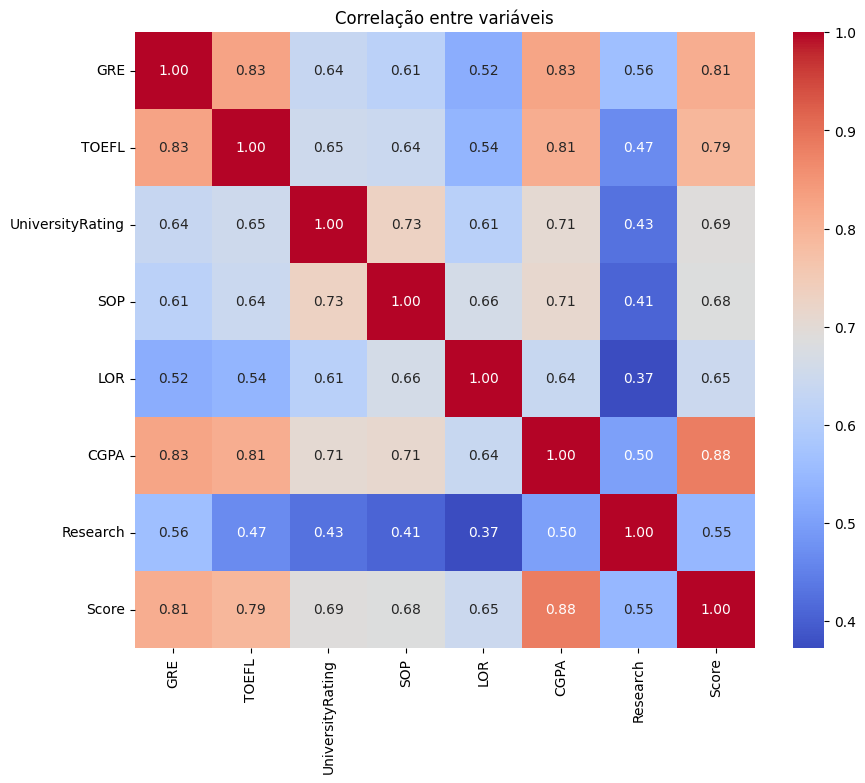

In [13]:
corr = dados.drop(columns=['Serial No.']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre variáveis")
plt.show()

### Histograma


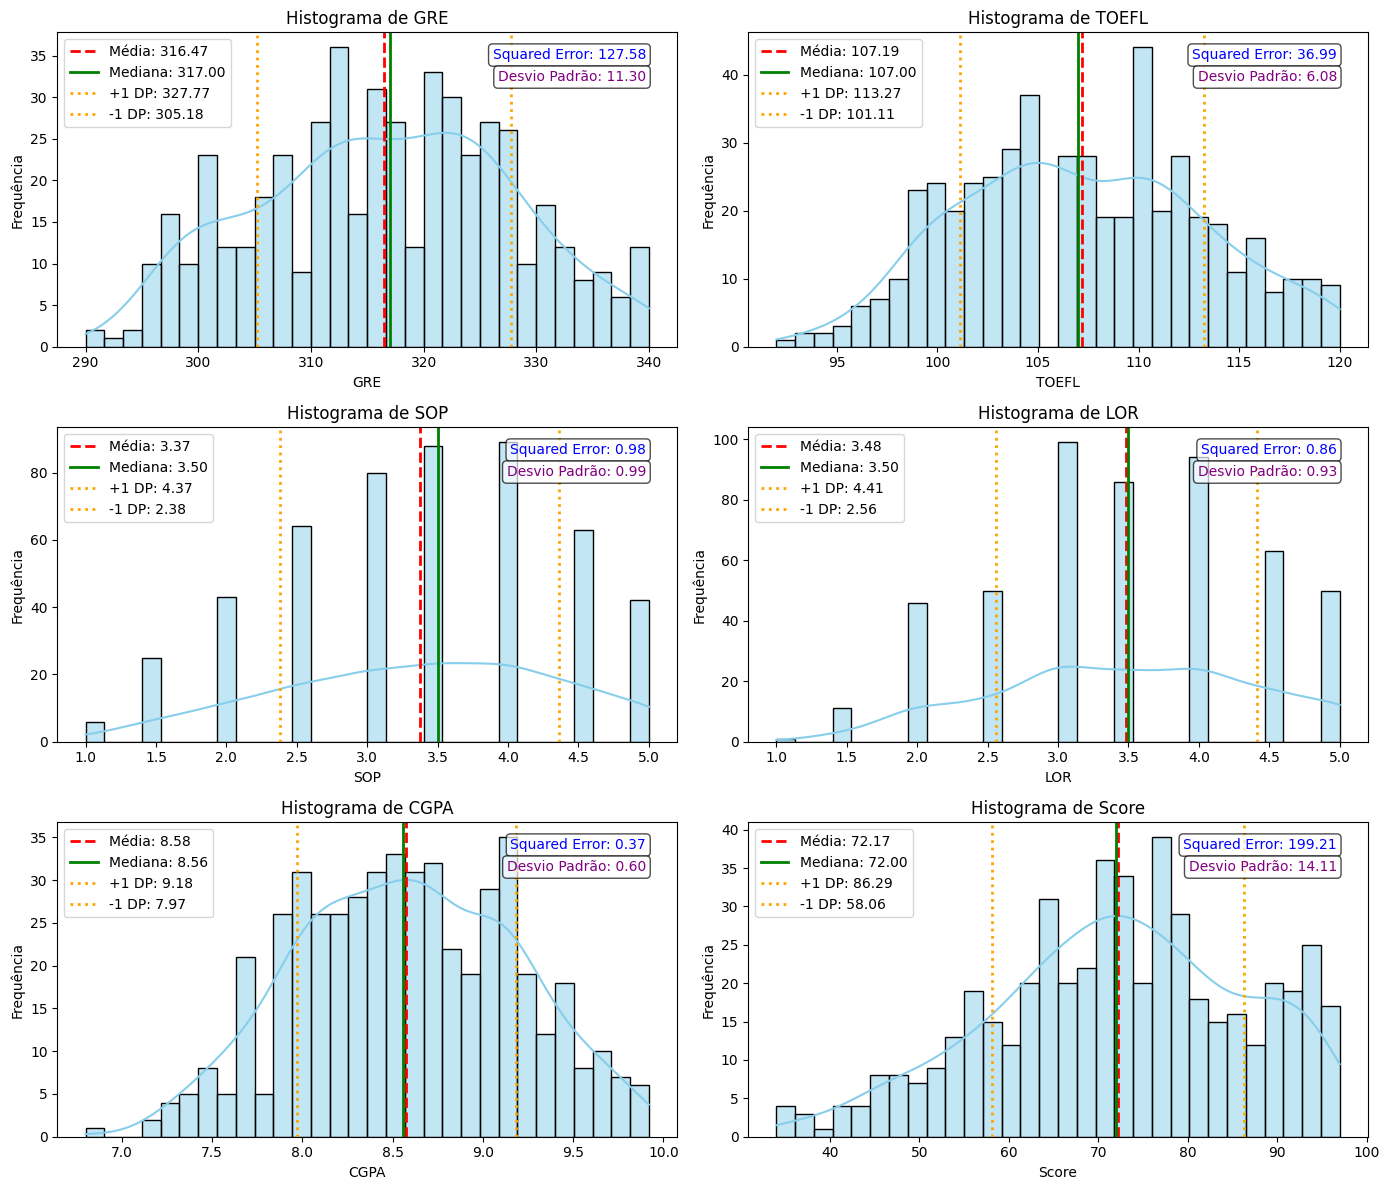

In [14]:
sets = ['GRE', 'TOEFL', 'SOP', 'LOR', 'CGPA', 'Score']

# Cria a grade de subplots (3 linhas, 2 colunas)
fig, axes = plt.subplots(3, 2, figsize=(14, 12))  
axes = axes.flatten()  # transforma matriz de eixos em lista

for i, col in enumerate(sets):
    media = dados[col].mean()
    mediana = dados[col].median()
    desvio = dados[col].std()
    squared_error = desvio**2  # variância

    # Histograma
    sns.histplot(dados[col], bins=30, kde=True, color='skyblue', ax=axes[i])

    # Média
    axes[i].axvline(media, color='red', linestyle='--', linewidth=2, 
                    label=f'Média: {media:.2f}')
    # Mediana
    axes[i].axvline(mediana, color='green', linestyle='-', linewidth=2, 
                    label=f'Mediana: {mediana:.2f}')
    # Desvio padrão
    axes[i].axvline(media + desvio, color='orange', linestyle=':', linewidth=2, 
                    label=f'+1 DP: {media+desvio:.2f}')
    axes[i].axvline(media - desvio, color='orange', linestyle=':', linewidth=2, 
                    label=f'-1 DP: {media-desvio:.2f}')
    
    # Inclui Squared Error (variância)
    axes[i].text(0.95, 0.95, f'Squared Error: {squared_error:.2f}',
                 transform=axes[i].transAxes, fontsize=10, 
                 color='blue', ha='right', va='top',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
    
    # Inclui Desvio Padrão logo abaixo
    axes[i].text(0.95, 0.88, f'Desvio Padrão: {desvio:.2f}',
                 transform=axes[i].transAxes, fontsize=10, 
                 color='purple', ha='right', va='top',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')
    axes[i].legend()

# Ajusta espaçamento
plt.tight_layout()
plt.show()


In [15]:
# Transformando variáveis explicativas categóricas em dummies
dados = pd.get_dummies(dados, columns=['UniversityRating'], drop_first=False, dtype=int)

In [18]:
# Separando as variáveis Y e X
X = dados.drop(columns=['Score'])
y = dados['Score']

# Separando as amostras de treino e teste


In [19]:

# Vamos escolher 70% das observações para treino e 30% para teste
# X_train → Features para treino
# X_test → Features para teste
# y_train → Alvos para treino
# y_test → Alvos para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Gerando a árvore de decisão e treinado o modelo


In [20]:

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=100)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=100)

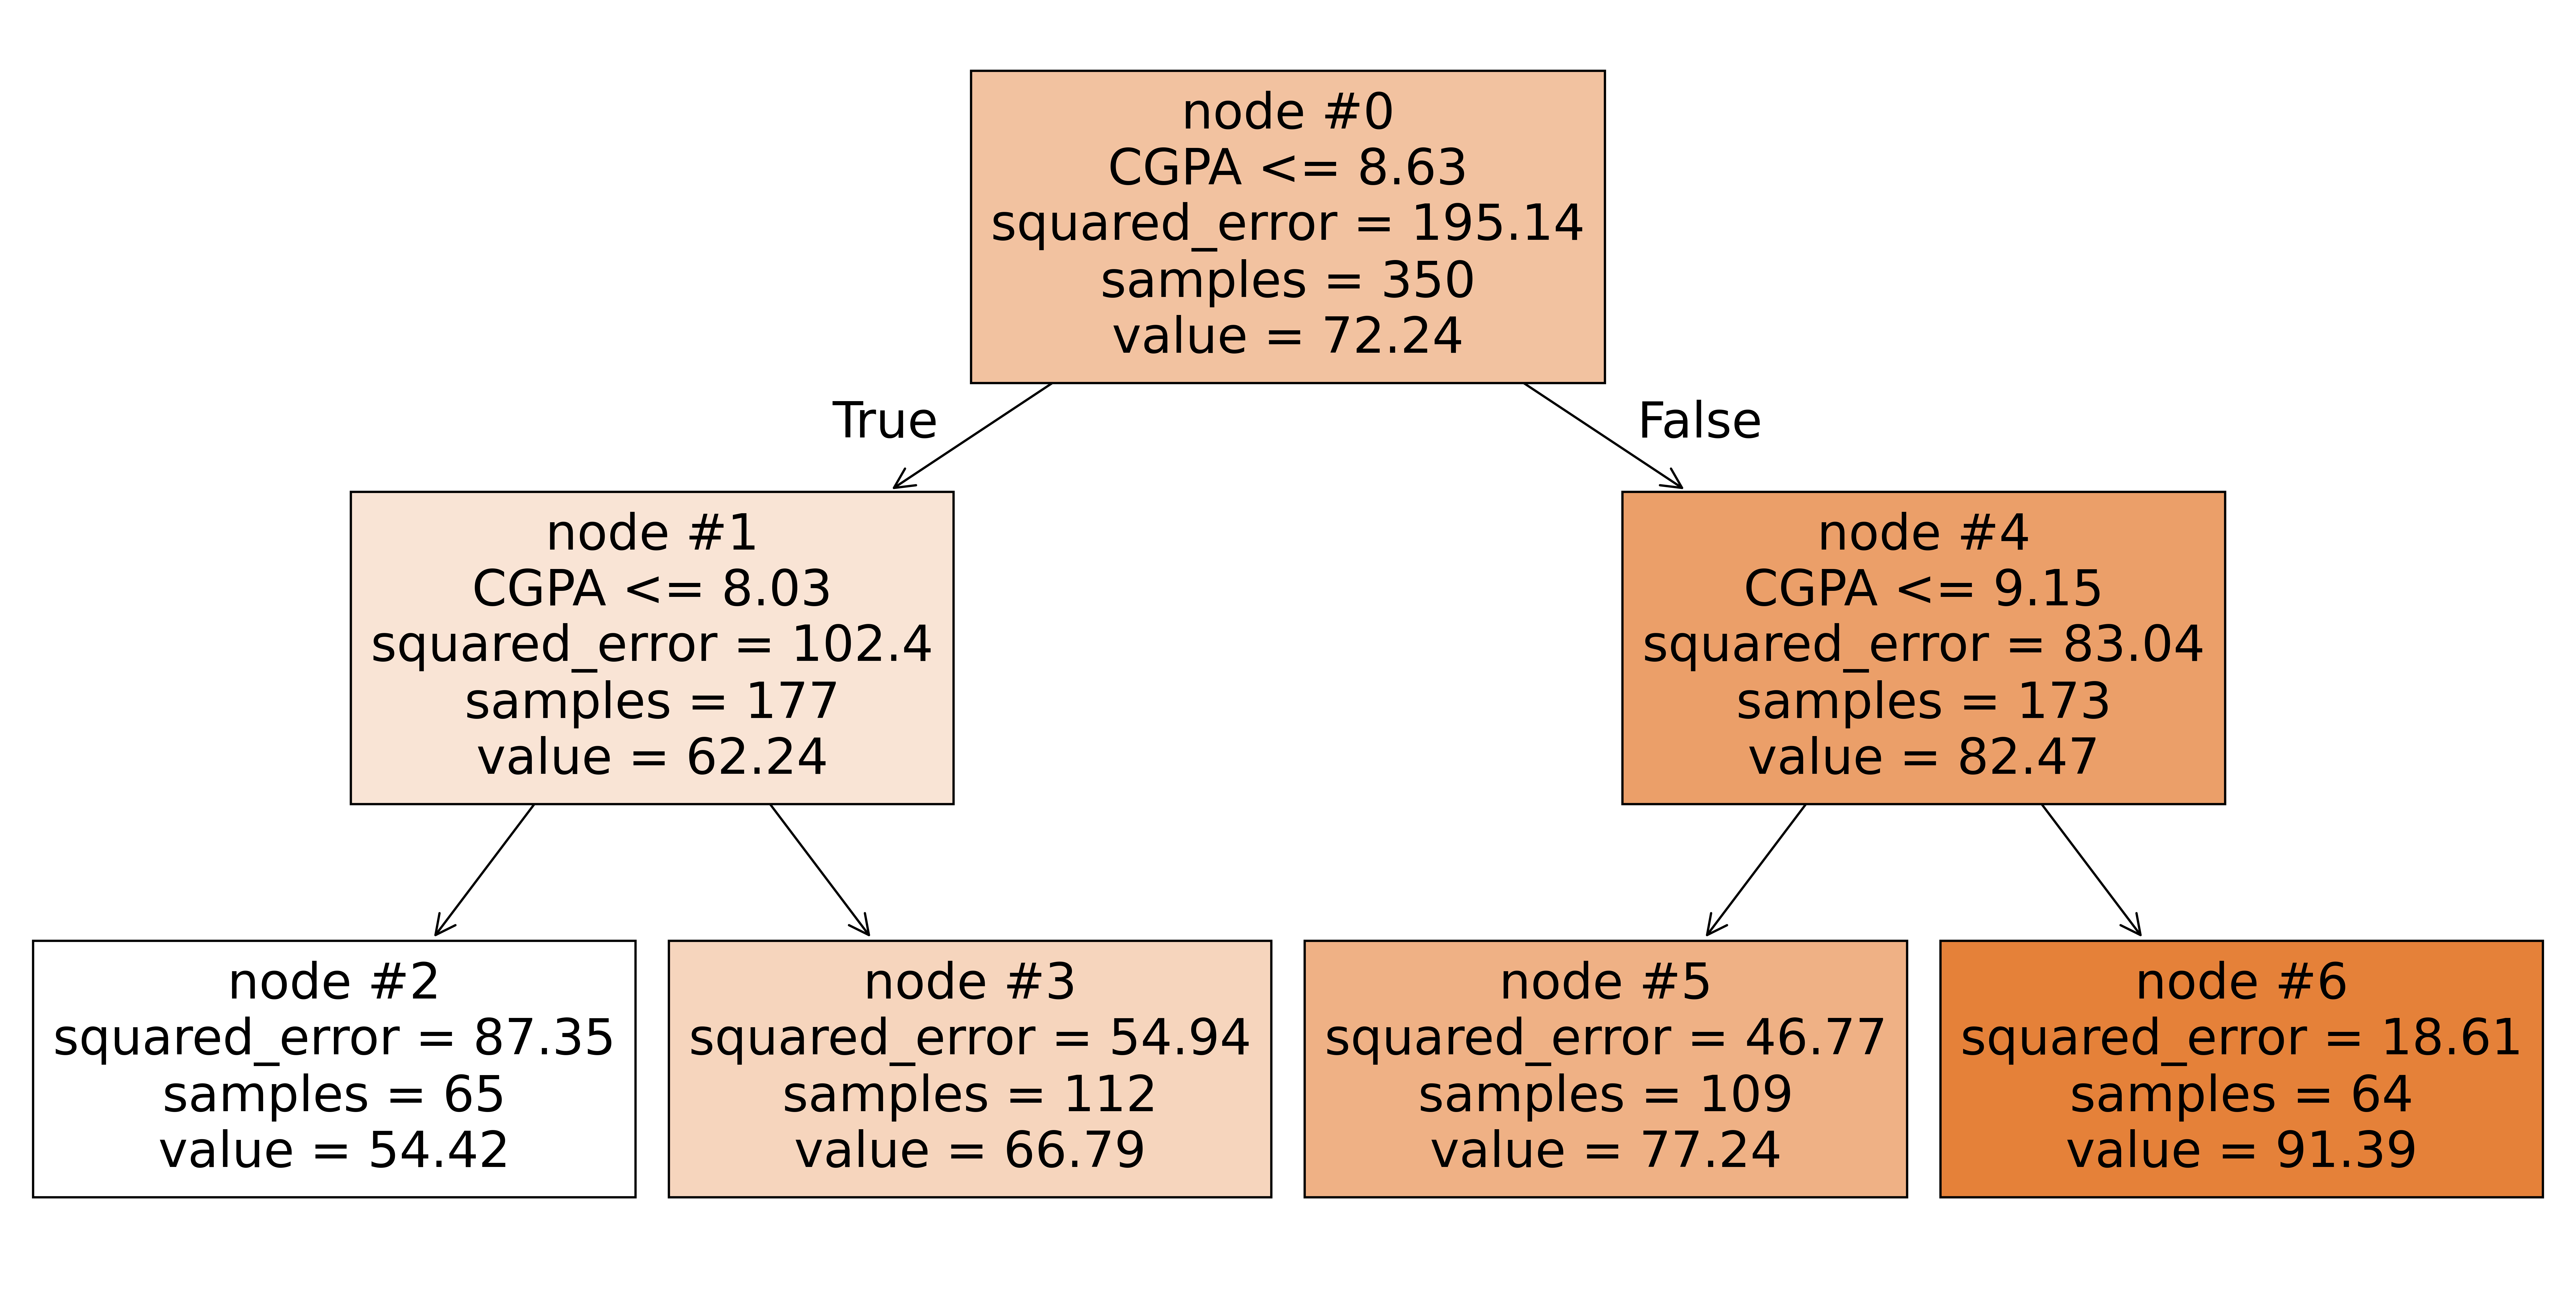

In [21]:
# Plotando a árvore
plt.figure(figsize=(20,10), dpi=600)
plot_tree(tree_reg,
          feature_names=X.columns.tolist(),
          filled=True,
          node_ids=True,
          precision=2)
plt.show()

In [22]:
# Analisando os resultados dos splits (calibrar a tesoura escolhendo o melhor ccp_alpha)
tree_split = pd.DataFrame(tree_reg.cost_complexity_pruning_path(X_train, y_train))
tree_split.sort_index(ascending=False, inplace=True)

display(tree_split)

ccp_alphas  impurities
3  102.310487  195.138163
2   23.074573   92.827676
1   17.982605   69.753103
0    0.000000   51.770498

In [23]:
# Importância das variáveis preditoras

tree_features = pd.DataFrame({'features':X.columns.tolist(),
                              'importance':tree_reg.feature_importances_})

display(tree_features)

features  importance
0           Serial No.         0.0
1                  GRE         0.0
2                TOEFL         0.0
3                  SOP         0.0
4                  LOR         0.0
5                 CGPA         1.0
6             Research         0.0
7   UniversityRating_1         0.0
8   UniversityRating_2         0.0
9   UniversityRating_3         0.0
10  UniversityRating_4         0.0
11  UniversityRating_5         0.0

## Obtendo os valores preditos pelo modelo

Resumindo numa metáfora
Treino → É como fazer exercícios de matemática na aula com o professor ajudando.
Teste → É como fazer a prova sozinho, sem colar.
O objetivo é tirar nota boa nas duas, mas principalmente no teste.


In [25]:
# Base de treinamento
#  Aqui o modelo pega as mesmas entradas que usou para aprender e gera as previsões.
# Serve para ver o quão bem ele aprendeu durante o treino.
# Se o valor previsto for muito próximo do valor real (y_train), significa que o modelo aprendeu bem.
tree_pred_train = tree_reg.predict(X_train)

# Base de teste
# Aqui o modelo pega novos dados que ele nunca viu e tenta prever.
# É nessa parte que medimos se ele generaliza bem — ou seja, se não aprendeu apenas de cor o treino.
tree_pred_test = tree_reg.predict(X_test)

#### Avaliando o modelo (base de treino)

MSE (Mean Squared Error) = 51.8
-> Erro quadrático médio: mede a média dos erros ao quadrado entre valores reais e previstos.
-> Quanto menor, melhor. Aqui, em média, o quadrado da diferença é 51.8.

RMSE (Root Mean Squared Error) = 7.2
-> Raiz quadrada do MSE, expressa o erro médio na mesma unidade da variável alvo (Score).
-> Indica que, em média, o modelo erra cerca de 7.2 pontos no Score na base de treino.

MAE (Mean Absolute Error) = 5.4
-> Erro absoluto médio: mede a média das diferenças absolutas entre valores reais e previstos.
-> Mais interpretável que o MSE, mostra que o erro médio é de aproximadamente 5.4 pontos no Score.

R² (Coeficiente de Determinação) = 73.5%
-> Mede a proporção da variação do Score que é explicada pelo modelo.
-> 73.5% significa que o modelo consegue explicar cerca de três quartos da variabilidade dos dados de treino.
-> Quanto mais próximo de 100%, melhor.

Resumo
O modelo acerta bem para um ajuste simples, errando em média metade da variação natural do Score.
Não é perfeito, mas já captura bem a relação entre as variáveis e o Score.


In [26]:
mse_train_tree = mean_squared_error(y_train, tree_pred_train)
mae_train_tree = mean_absolute_error(y_train, tree_pred_train)
r2_train_tree = r2_score(y_train, tree_pred_train)

print("Avaliação do Modelo (Base de Treino)")
print(f"MSE: {mse_train_tree:.1f}")
print(f"RMSE: {np.sqrt(mse_train_tree):.1f}")
print(f"MAE: {mae_train_tree:.1f}")
print(f"R²: {r2_train_tree:.1%}")

Avaliação do Modelo (Base de Treino)
MSE: 51.8
RMSE: 7.2
MAE: 5.4
R²: 73.5%


### Avaliando o modelo (base de testes)

Resultados muito próximos aos da base de treino → o modelo generaliza bem.
Pequena diferença nos erros indica que não houve overfitting.
O modelo mantém bom desempenho mesmo em dados que ele nunca viu.


In [83]:
mse_test_tree = mean_squared_error(y_test, tree_pred_test)
mae_test_tree = mean_absolute_error(y_test, tree_pred_test)
r2_test_tree = r2_score(y_test, tree_pred_test)

print("Avaliação do Modelo (Base de Teste)")
print(f"MSE: {mse_test_tree:.1f}")
print(f"RMSE: {np.sqrt(mse_test_tree):.1f}")
print(f"MAE: {mae_test_tree:.1f}")
print(f"R²: {r2_test_tree:.1%}")

Avaliação do Modelo (Base de Teste)
MSE: 55.2
RMSE: 7.4
MAE: 5.8
R²: 73.4%


### Grid Search

Queremos encontrar a melhor combinação dos hiperparâmetros (configurações) da árvore de decisão que deixa o modelo mais preciso para prever.
Cada hiperparâmetro (como profundidade da árvore, número mínimo para dividir, etc) afeta muito o desempenho do modelo.
O Grid Search testa automaticamente todas as combinações possíveis dessas configurações, avaliando qual delas gera o menor erro.


In [27]:
# Vamos aplicar um Grid Search
param_grid_tree = {
    'max_depth': [3, 5, 10],          # Profundidade máxima da árvore (quantos níveis ela pode ter)
    'min_samples_split': [5, 10, 15], # Número mínimo de exemplos para tentar dividir um nó
    'min_samples_leaf': [5, 10]       # Número mínimo de exemplos que um nó folha deve ter
}


# Identificar o algoritmo em uso
tree_grid = DecisionTreeRegressor(random_state=100)

# Treinar os modelos para o grid search
tree_grid_model = GridSearchCV(
    estimator = tree_grid,              # Modelo base
    param_grid = param_grid_tree,       # Conjunto de parâmetros a testar
    scoring = 'neg_mean_squared_error', # Métrica para avaliar o modelo (quanto menor o erro, melhor)
    cv = 5,                             # Validação cruzada com 5 "partes" (dividindo treino em 5 partes para avaliar)
    verbose = 2                         # Mostrar o progresso do processo
)


tree_grid_model.fit(X_train, y_train)

# Verificando os melhores parâmetros obtidos
tree_grid_model.best_params_

# Gerando o modelo com os melhores hiperparâmetros
tree_best = tree_grid_model.best_estimator_

# Predict do modelo
tree_grid_pred_train = tree_best.predict(X_train)
tree_grid_pred_test = tree_best.predict(X_test)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=15; total time=   0.0s
[CV] END max_depth=3, min_sampl

### Plotando a árvore após o grid search


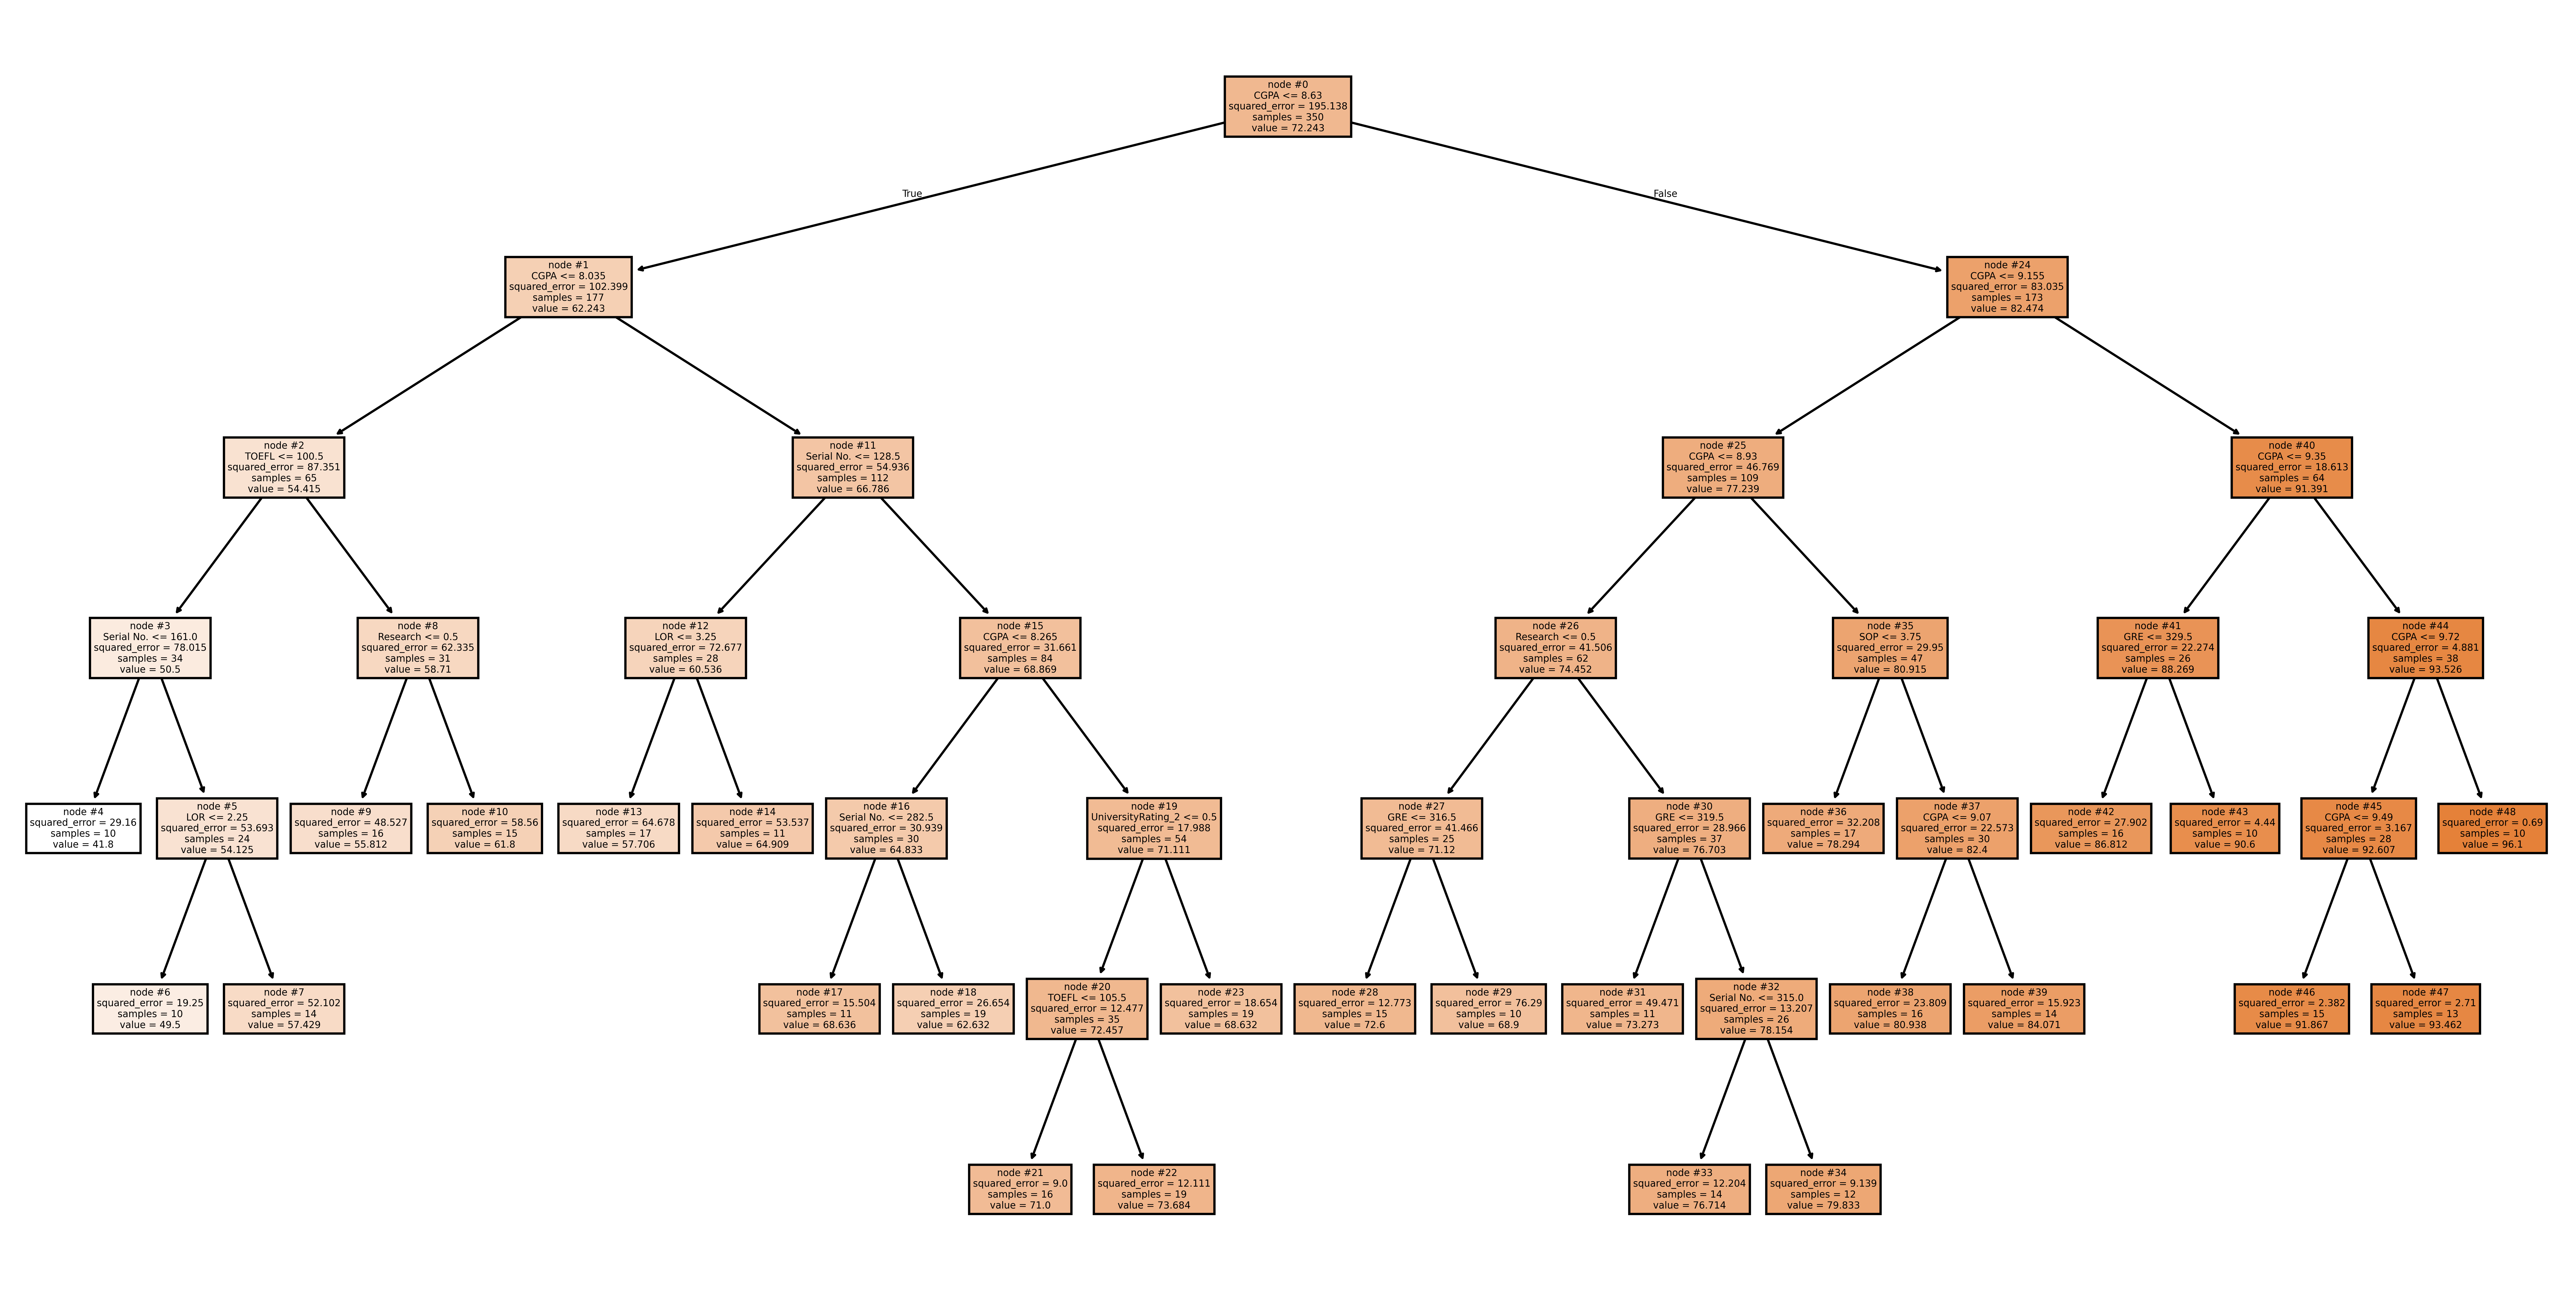

In [28]:
plt.figure(figsize=(20,10), dpi=600)
plot_tree(tree_best,
          feature_names=X.columns.tolist(),
          filled=True,
          node_ids=True)
plt.show()


### Avaliando o novo modelo (base de treino)


In [86]:
mse_train_tree_grid = mean_squared_error(y_train, tree_grid_pred_train)
mae_train_tree_grid = mean_absolute_error(y_train, tree_grid_pred_train)
r2_train_tree_grid = r2_score(y_train, tree_grid_pred_train)

print("Avaliação do Modelo (Base de Treino)")
print(f"MSE: {mse_train_tree_grid:.1f}")
print(f"RMSE: {np.sqrt(mse_train_tree_grid):.1f}")
print(f"MAE: {mae_train_tree_grid:.1f}")
print(f"R²: {r2_train_tree_grid:.1%}")

Avaliação do Modelo (Base de Treino)
MSE: 27.0
RMSE: 5.2
MAE: 3.7
R²: 86.1%


#### Avaliando o novo modelo (base de teste)


In [87]:
mse_test_tree_grid = mean_squared_error(y_test, tree_grid_pred_test)
mae_test_tree_grid = mean_absolute_error(y_test, tree_grid_pred_test)
r2_test_tree_grid = r2_score(y_test, tree_grid_pred_test)

print("Avaliação do Modelo (Base de Teste)")
print(f"MSE: {mse_test_tree_grid:.1f}")
print(f"RMSE: {np.sqrt(mse_test_tree_grid):.1f}")
print(f"MAE: {mae_test_tree_grid:.1f}")
print(f"R²: {r2_test_tree_grid:.1%}")

Avaliação do Modelo (Base de Teste)
MSE: 42.8
RMSE: 6.5
MAE: 4.9
R²: 79.4%


In [88]:
tree_features = pd.DataFrame({'features':X.columns.tolist(),
                              'importance':tree_best.feature_importances_}).sort_values(by='importance', ascending=False).reset_index(drop=True)

print(tree_features)

              features  importance
0                 CGPA    0.895072
1           Serial No.    0.048349
2                TOEFL    0.019639
3             Research    0.012620
4                  LOR    0.012122
5                  GRE    0.006027
6                  SOP    0.003109
7   UniversityRating_2    0.003063
8   UniversityRating_1    0.000000
9   UniversityRating_3    0.000000
10  UniversityRating_4    0.000000
11  UniversityRating_5    0.000000


#### Depois do Grid Search

MSE, RMSE e MAE menores → erro caiu bastante, o modelo está mais preciso.

R² subiu para ~86% no treino e 79% no teste → o modelo explica muito melhor a variação dos dados, e o desempenho no teste melhorou também, indicando que ele generalizou melhor.


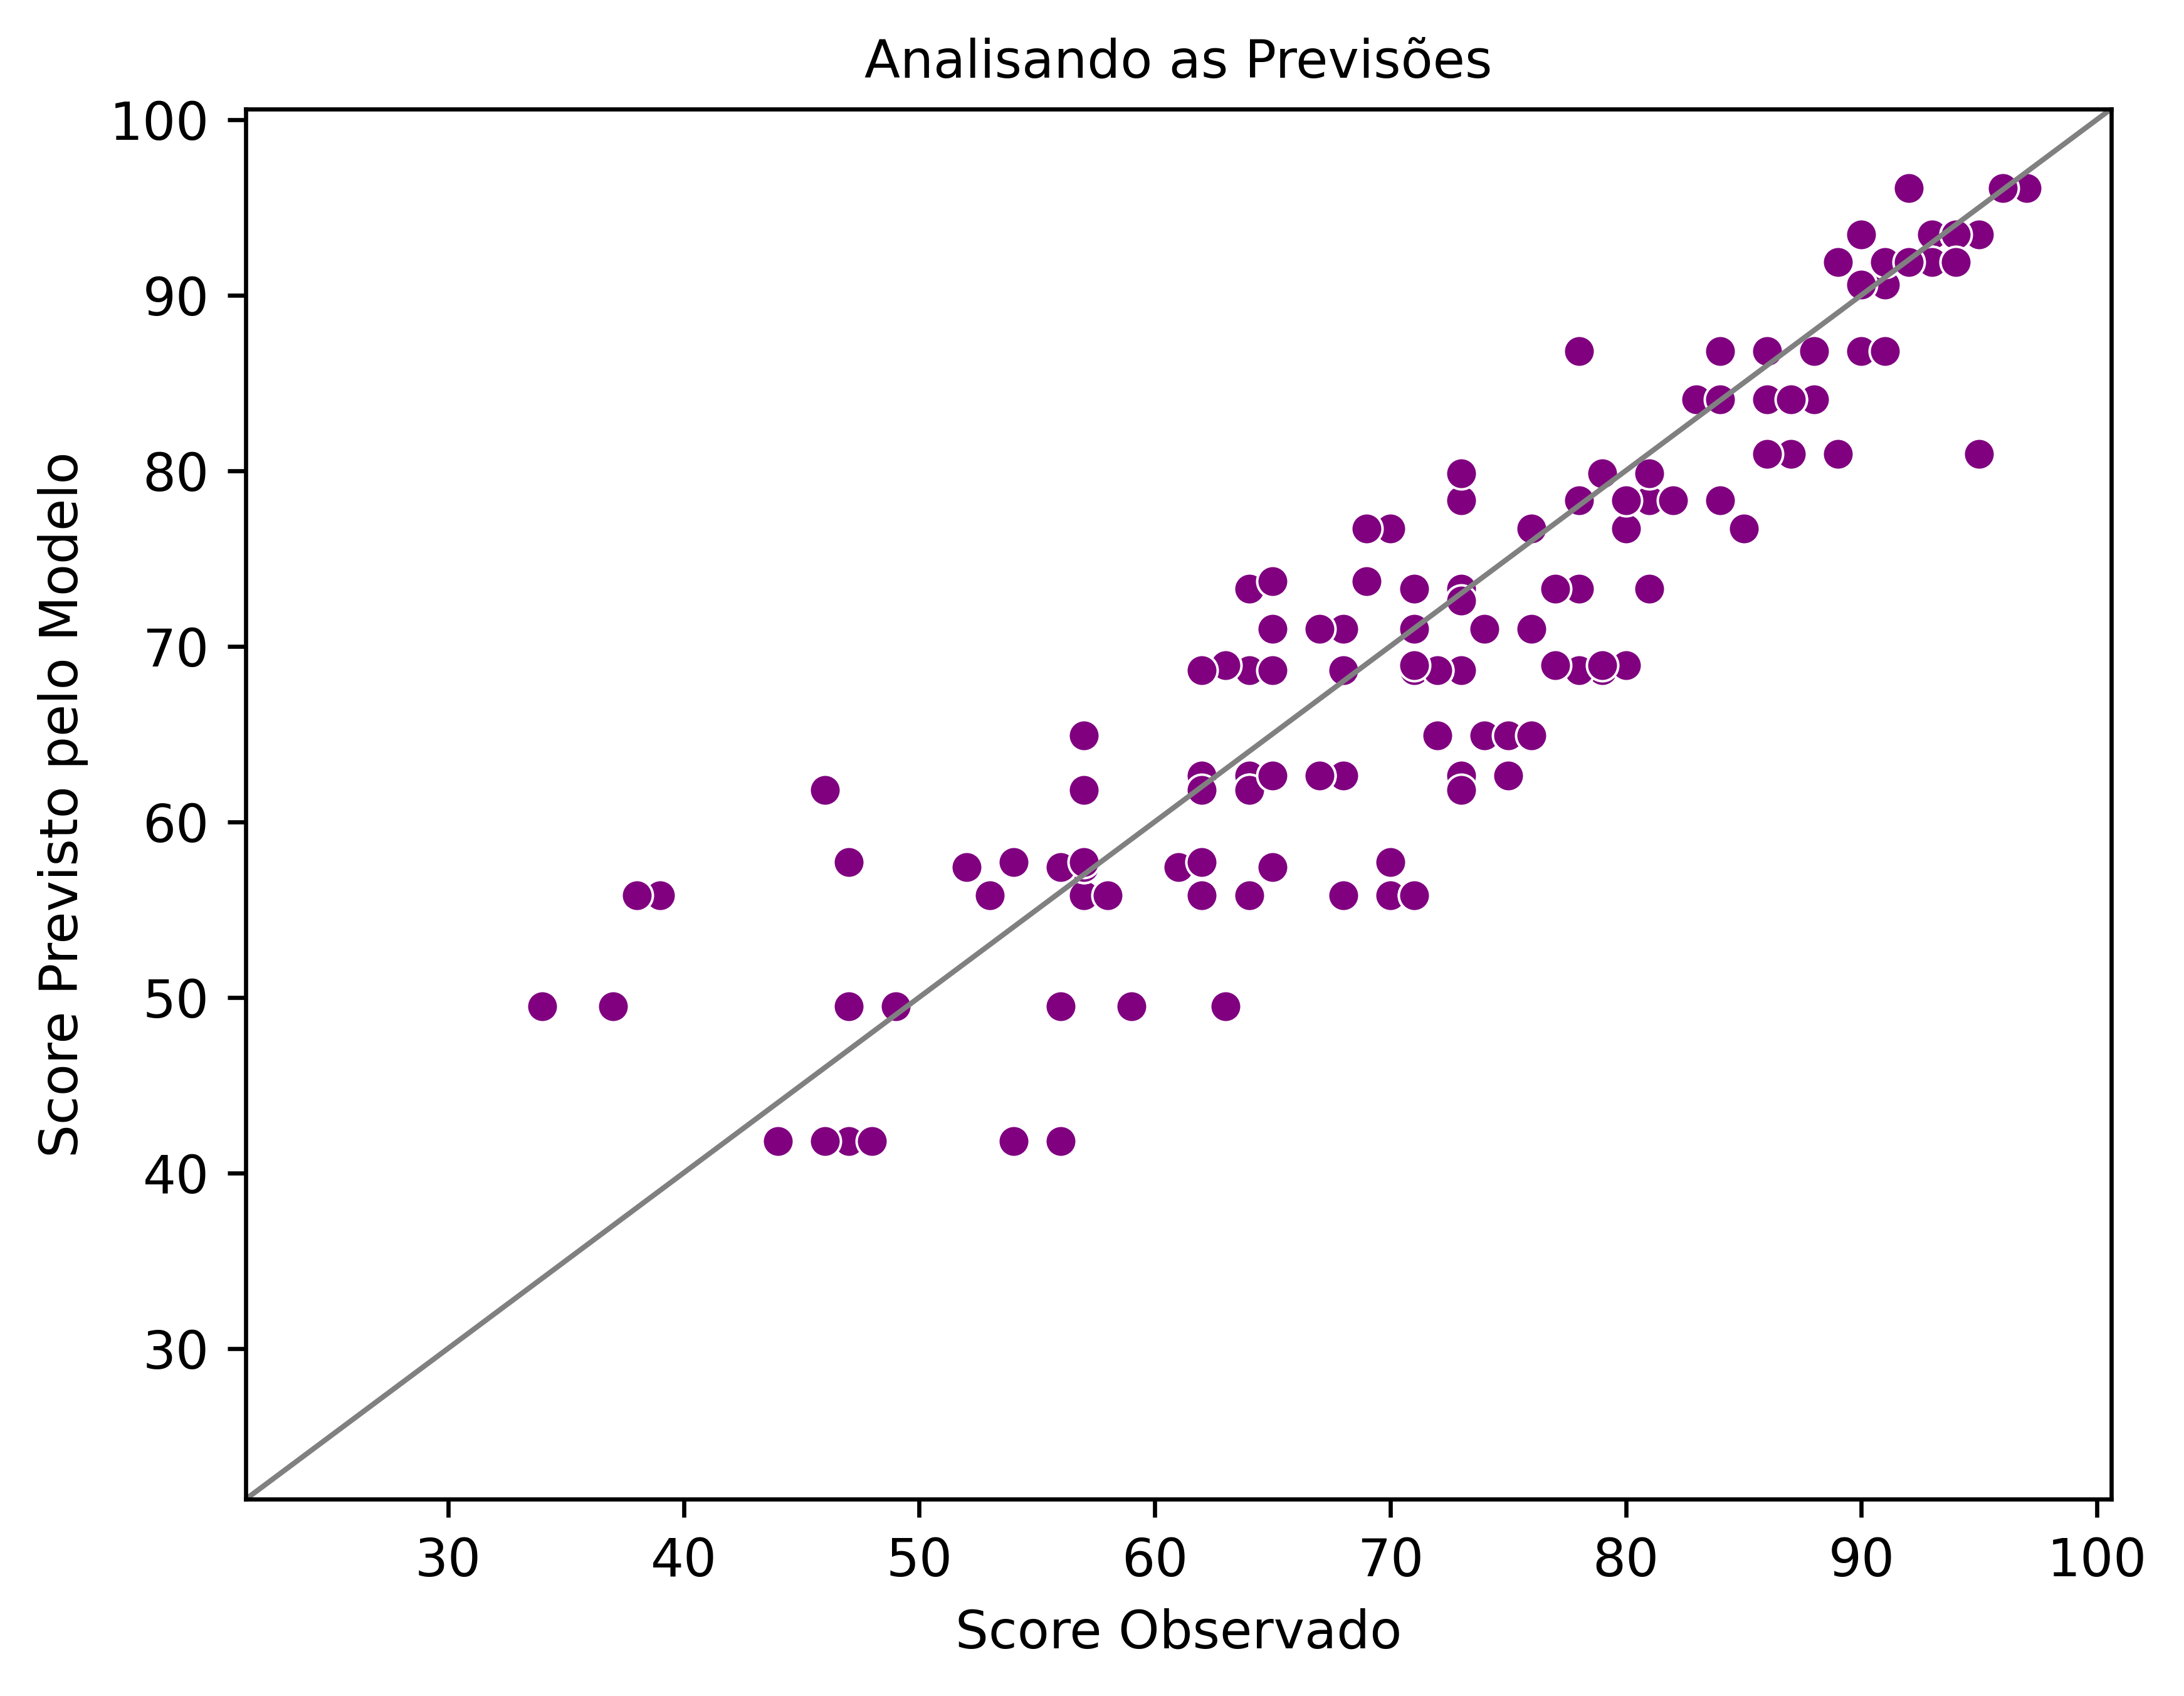

In [ ]:
# Gráfico fitted values

# Valores preditos pelo modelo para as observações da amostra de teste
graph = pd.DataFrame({'Score': y_test,
                      'pred_tree': tree_grid_pred_test})

plt.figure(dpi=600)
sns.scatterplot(graph, x='Score', y='pred_tree', color='purple')
plt.title('Analisando as Previsões', fontsize=10)
plt.xlabel('Score Observado', fontsize=10)
plt.ylabel('Score Previsto pelo Modelo', fontsize=10)
plt.axline((25, 25), (max(dados['Score']), max(dados['Score'])), linewidth=1, color='grey')
plt.show()

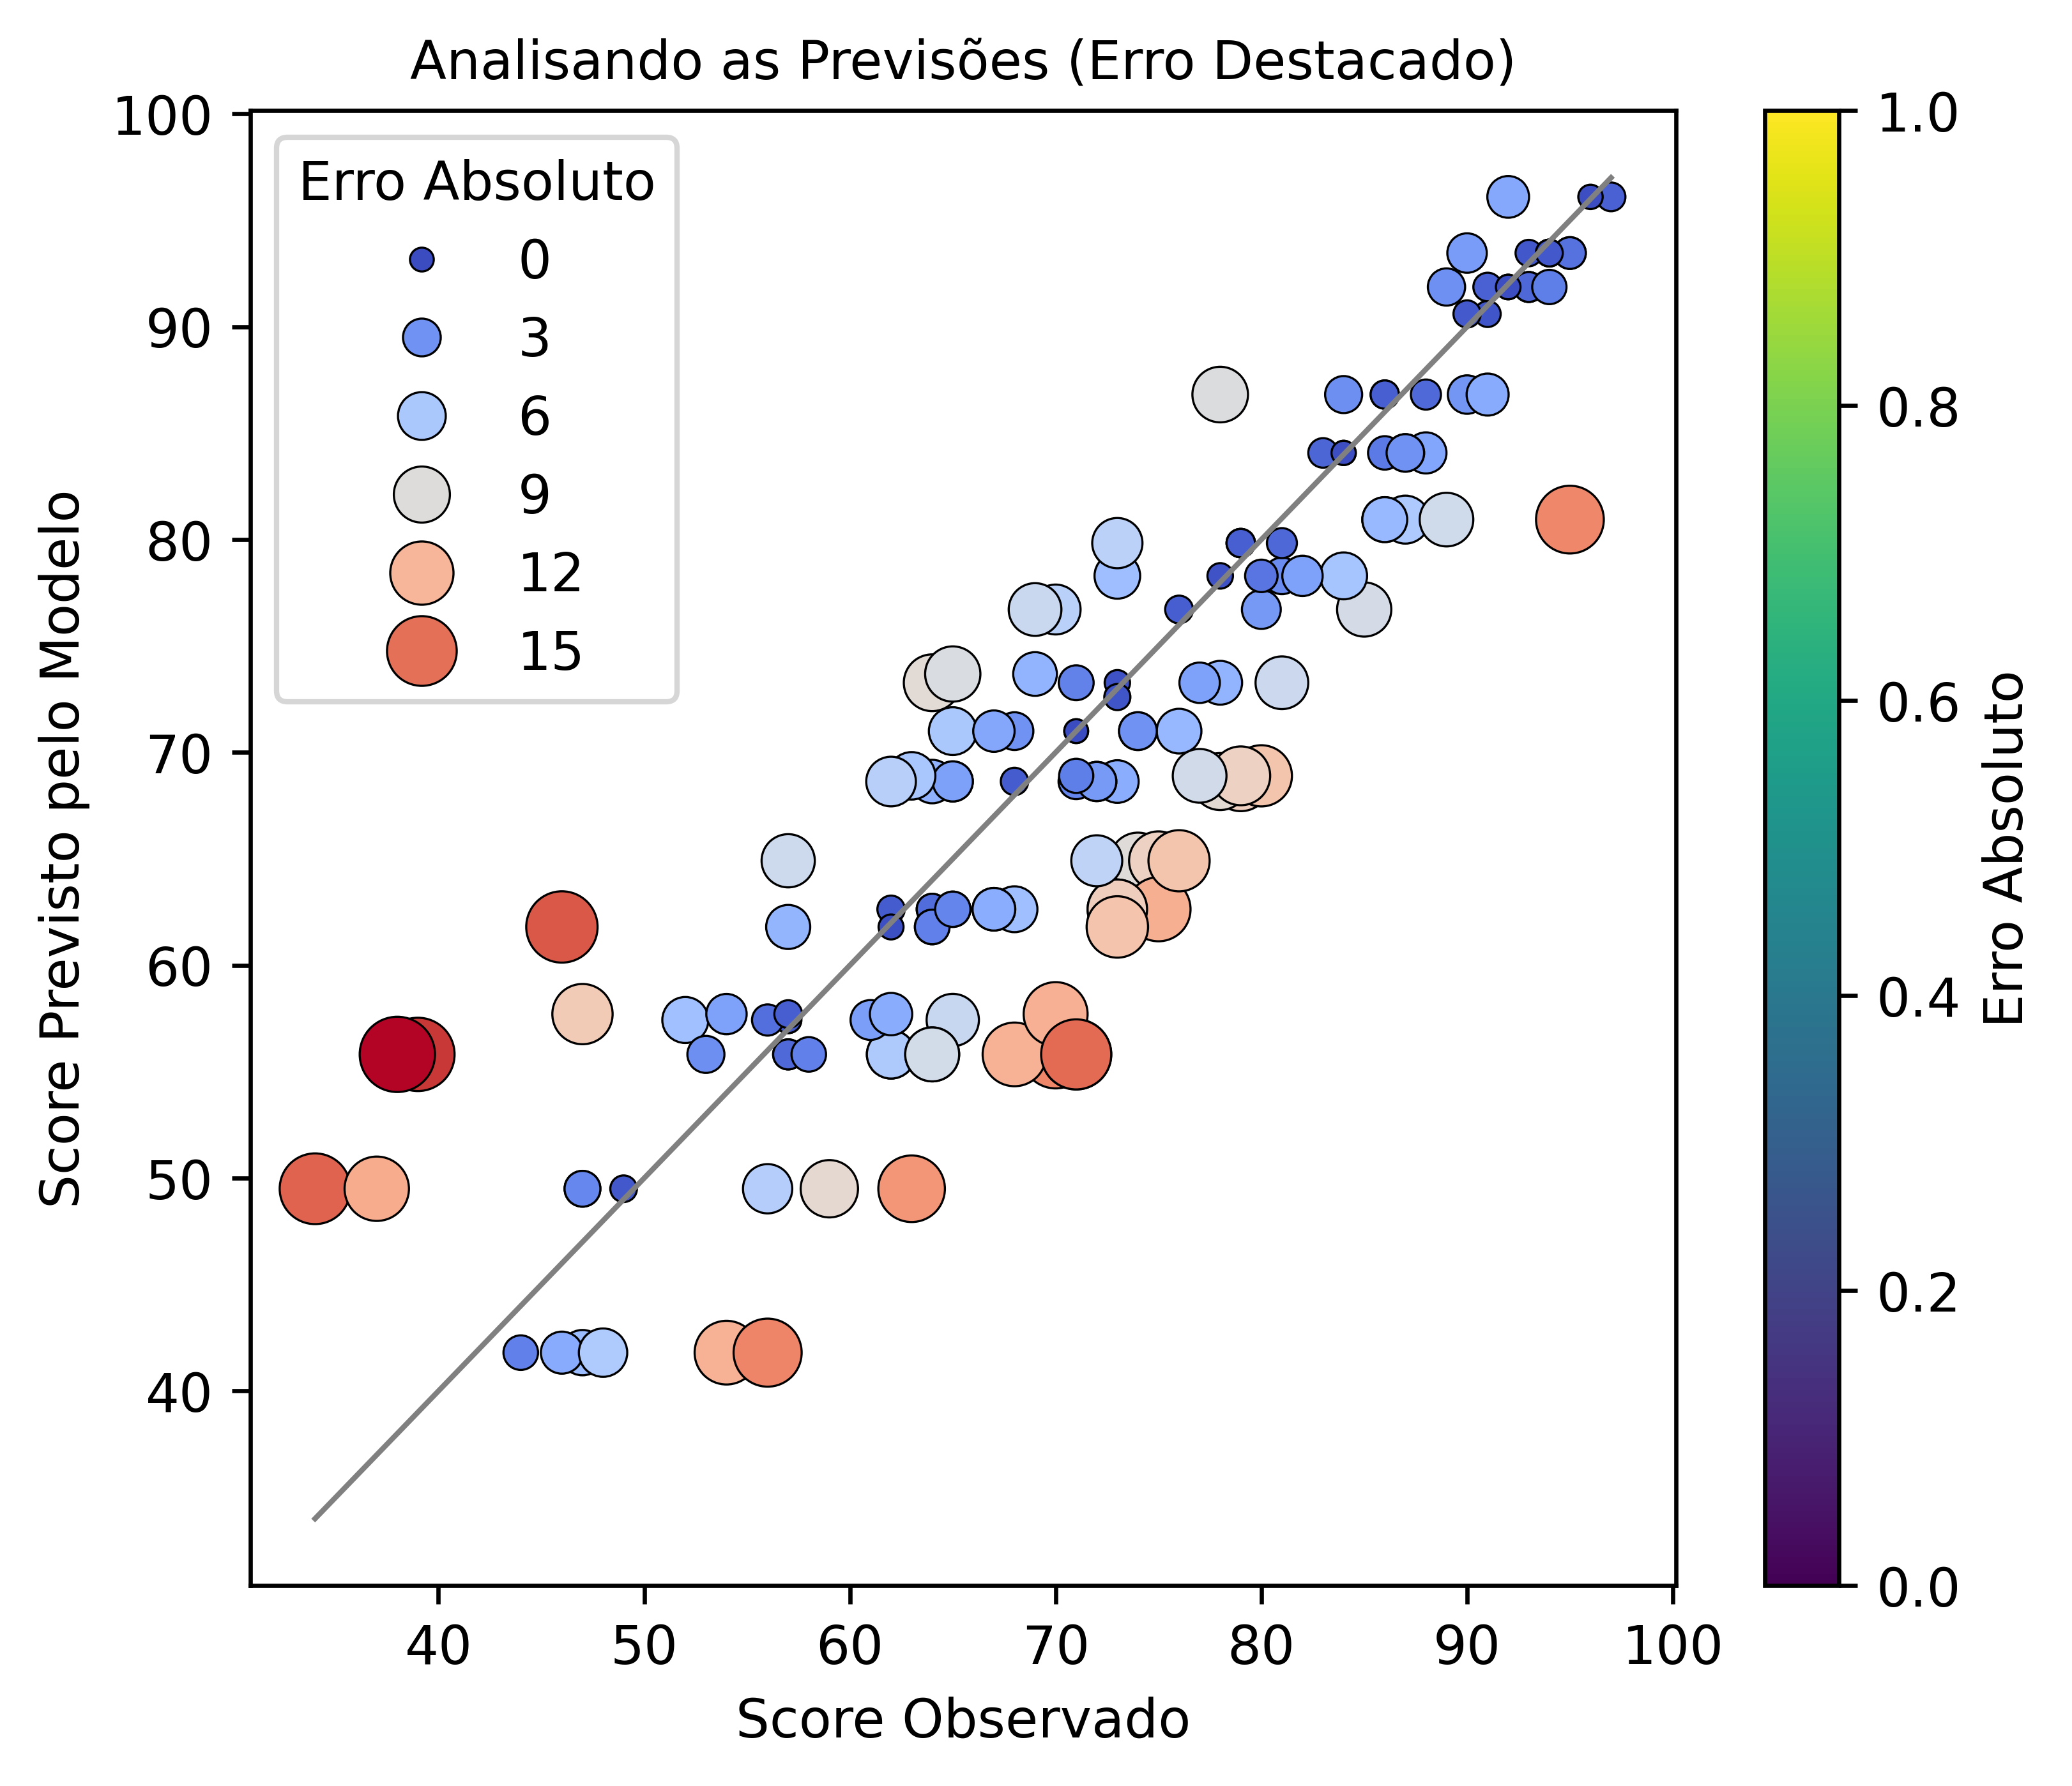

In [29]:
# Cria DataFrame com observados, previstos e erro
graph = pd.DataFrame({
    'Score Observado': y_test,
    'Score Previsto': tree_grid_pred_test
})
graph['Erro Absoluto'] = np.abs(graph['Score Previsto'] - graph['Score Observado'])

# Plot do gráfico com destaque para os erros
plt.figure(dpi=600, figsize=(6, 5))
scatter = sns.scatterplot(
    data=graph,
    x='Score Observado',
    y='Score Previsto',
    hue='Erro Absoluto',
    palette='coolwarm',
    size='Erro Absoluto',
    sizes=(20, 200),
    edgecolor='black'
)

# Linha ideal (previsão perfeita)
min_val = min(graph['Score Observado'].min(), graph['Score Previsto'].min())
max_val = max(graph['Score Observado'].max(), graph['Score Previsto'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='grey', linewidth=1)

plt.title('Analisando as Previsões (Erro Destacado)', fontsize=10)
plt.xlabel('Score Observado', fontsize=10)
plt.ylabel('Score Previsto pelo Modelo', fontsize=10)

# Barra de cores para o erro
plt.colorbar(scatter.collections[0], label='Erro Absoluto')

plt.show()


## Testando modelo com e sem Grid Search


In [32]:
# SEM GRID SEARCH
# Lista com 10 candidatos (dados brutos, como no dataset original)
novos_candidatos_raw = pd.DataFrame({
    'GRE': [320, 315, 300, 325, 310, 305, 330, 298, 340, 310],
    'TOEFL': [110, 105, 100, 115, 108, 102, 112, 99, 118, 106],
    'SOP': [4.5, 4.0, 3.5, 5.0, 4.0, 3.0, 4.5, 3.5, 5.0, 4.0],
    'LOR': [4.0, 3.5, 3.0, 4.5, 4.0, 3.0, 4.5, 3.0, 5.0, 3.5],
    'CGPA': [9.2, 8.8, 8.0, 9.5, 8.5, 7.8, 9.6, 7.5, 9.8, 8.4],
    'UniversityRating': [3, 4, 2, 5, 3, 2, 5, 2, 5, 3],
    'Research': [1, 0, 1, 1, 0, 0, 1, 0, 1, 1]
})

# Aplica o mesmo pré-processamento do treino
novos_candidatos_proc = pd.get_dummies(novos_candidatos_raw)

# Garante que as colunas estão na mesma ordem que no treino
novos_candidatos_proc = novos_candidatos_proc.reindex(columns=X_train.columns, fill_value=0)

# Faz a previsão para todos
scores_previstos = tree_reg.predict(novos_candidatos_proc)

# Mostra resultado junto com dados originais
resultado = novos_candidatos_raw.copy()
resultado['Score Previsto'] = scores_previstos

display(resultado)


GRE  TOEFL  SOP  LOR  CGPA  UniversityRating  Research  Score Previsto
0  320    110  4.5  4.0   9.2                 3         1       91.390625
1  315    105  4.0  3.5   8.8                 4         0       77.238532
2  300    100  3.5  3.0   8.0                 2         1       54.415385
3  325    115  5.0  4.5   9.5                 5         1       91.390625
4  310    108  4.0  4.0   8.5                 3         0       66.785714
5  305    102  3.0  3.0   7.8                 2         0       54.415385
6  330    112  4.5  4.5   9.6                 5         1       91.390625
7  298     99  3.5  3.0   7.5                 2         0       54.415385
8  340    118  5.0  5.0   9.8                 5         1       91.390625
9  310    106  4.0  3.5   8.4                 3         1       66.785714

In [33]:
# COM GRID SEARCH 
# Lista com 10 candidatos (dados brutos, como no dataset original)
novos_candidatos_raw = pd.DataFrame({
    'GRE': [320, 315, 300, 325, 310, 305, 330, 298, 340, 310],
    'TOEFL': [110, 105, 100, 115, 108, 102, 112, 99, 118, 106],
    'SOP': [4.5, 4.0, 3.5, 5.0, 4.0, 3.0, 4.5, 3.5, 5.0, 4.0],
    'LOR': [4.0, 3.5, 3.0, 4.5, 4.0, 3.0, 4.5, 3.0, 5.0, 3.5],
    'CGPA': [9.2, 8.8, 8.0, 9.5, 8.5, 7.8, 9.6, 7.5, 9.8, 8.4],
    'UniversityRating': [3, 4, 2, 5, 3, 2, 5, 2, 5, 3],
    'Research': [1, 0, 1, 1, 0, 0, 1, 0, 1, 1]
})

# Aplica o mesmo pré-processamento do treino
novos_candidatos_proc = pd.get_dummies(novos_candidatos_raw)

# Garante que as colunas estão na mesma ordem que no treino
novos_candidatos_proc = novos_candidatos_proc.reindex(columns=X_train.columns, fill_value=0)

# Faz a previsão para todos
scores_previstos = tree_best.predict(novos_candidatos_proc)

# Mostra resultado junto com dados originais
resultado = novos_candidatos_raw.copy()
resultado['Score Previsto'] = scores_previstos

display(resultado)


GRE  TOEFL  SOP  LOR  CGPA  UniversityRating  Research  Score Previsto
0  320    110  4.5  4.0   9.2                 3         1       86.812500
1  315    105  4.0  3.5   8.8                 4         0       72.600000
2  300    100  3.5  3.0   8.0                 2         1       41.800000
3  325    115  5.0  4.5   9.5                 5         1       93.461538
4  310    108  4.0  4.0   8.5                 3         0       64.909091
5  305    102  3.0  3.0   7.8                 2         0       55.812500
6  330    112  4.5  4.5   9.6                 5         1       93.461538
7  298     99  3.5  3.0   7.5                 2         0       41.800000
8  340    118  5.0  5.0   9.8                 5         1       96.100000
9  310    106  4.0  3.5   8.4                 3         1       64.909091

In [34]:
import joblib

# Salva o modelo treinado
joblib.dump(tree_best, "modelo_score.pkl")

# Salva as colunas do treino
joblib.dump(list(X_train.columns), "colunas_treino.pkl")


['colunas_treino.pkl']